# Logistic Regression
## With Stochatic Gradient Descent
### Demonstrated in TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Generate some data from the logistic model.

In [14]:
w_true, b_true = .5, .1
x_data = np.linspace(-10, 10, 100)
true_y_given_x =  1/(1 + np.exp(-w_true*x_data-b_true))
y_data = np.random.random(100) < true_y_given_x

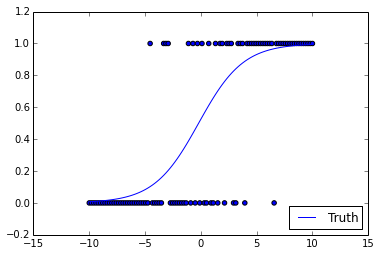

In [15]:
def plotter(fitted_data=None):
    plt.scatter(x_data, y_data);
    plt.plot(x_data, true_y_given_x, label="Truth");
    if fitted_data is not None:
        plt.plot(x_data, fitted_data, label="Fitted");
    plt.legend(loc=4);

plotter()

### Tensorflow

In [5]:
sess = tf.InteractiveSession()
# We need an interactive session while using Ipython Notebooks

Build the Graph.

In [24]:
#Declare x, y as points for data-entry.
x = tf.placeholder(tf.float32, shape=(None,), name="x")
y = tf.placeholder(tf.float32, shape=(None,), name="y")

#Declare w, b as parameters for the model.
w = tf.Variable(np.random.normal(), name="w", trainable=True)
b = tf.Variable(0., name="b", trainable=True)

# Define the logsitic model
p_y_given_x = 1/(1 + tf.exp(-w*x-b))

# Cross-entropy loss. Negative Log liklihood of the true label y.
ce_loss = -tf.log(p_y_given_x * y  + (1-p_y_given_x) * (1-y))
ce_loss = tf.reduce_mean(ce_loss)

# Add an L2 Penalty on the weights
lambda2 = .1
l2_loss = lambda2 * w * w             # tf.nn.l2_loss(w)
loss = ce_loss + l2_loss

sess.run(tf.initialize_all_variables())

Evaluate the randomly initalized model (as a reference).

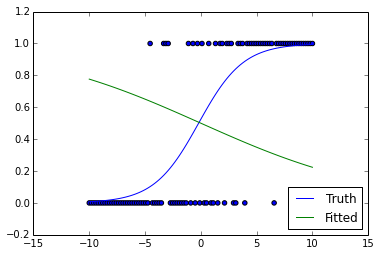

In [25]:
curr_pred = sess.run(p_y_given_x, {x:x_data})
plotter(curr_pred)

Run an SGD optimizer.

You need to evaluate the train_op for the session to perfrom a gradient descent step.

Here we train for 100 iterations, and accumulate the two loss terms.

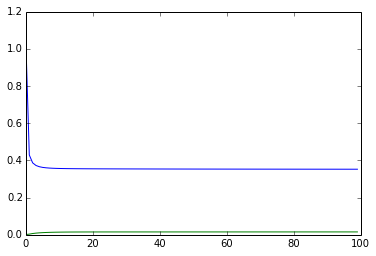

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

ce_losses = []
l2_losses = []
for t in range(100):
    loss_ce, loss_l2, _ = sess.run([ce_loss, l2_loss, train_op], {x: x_data, y: y_data})
    ce_losses.append(loss_ce)
    l2_losses.append(loss_l2)

plt.plot(ce_losses);
plt.plot(l2_losses);


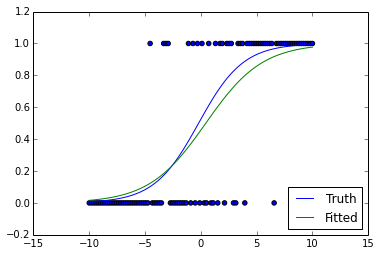

In [27]:
curr_pred = sess.run(p_y_given_x, {x:x_data})
plotter(curr_pred)

In [28]:
print "w: True:{} Fitted:{}".format(w_true, w.eval())
print "b: True:{} Fitted:{}".format(b_true, b.eval())

w: True:0.5 Fitted:0.393911629915
b: True:0.1 Fitted:-0.17432180047


As we can see the "W" has been estimated to have the same sign, and slightly small magnitude (because of the L2 penalty). But b is slightly off (to compensate for wrong w?).